In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the dataset
# Assuming 'survey_lung_cancer.csv' is uploaded in Google Colab
data = pd.read_csv('survey lung cancer.csv')

In [3]:
# Step 3: Remove any leading or trailing whitespace from column names
data.columns = data.columns.str.strip()

In [5]:
# Step 4: Display the first few rows and column names to confirm cleanup
print("First few rows of the dataset:")
print(data.head())
print("\nColumn names:", data.columns.tolist())

First few rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1        2        1         2                  2         2   
1                2        2        2         1                  1         1   
2                1        2        1         2                  1         2   
3                1        1        1         1                  2         1   
4                1        1        1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2   

In [6]:
# Step 5: Check for any missing values
print("\nMissing values in each column:")
print(data.isnull().sum())



Missing values in each column:
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [7]:
# Step 6: Data Preprocessing
# Encoding categorical variables
# Convert categorical 'LUNG_CANCER' to binary (1 for 'YES', 0 for 'NO')
data['LUNG_CANCER'] = data['LUNG_CANCER'].apply(lambda x: 1 if x.strip().upper() == 'YES' else 0)

In [8]:
# Convert gender to numeric
data['GENDER'] = data['GENDER'].apply(lambda x: 1 if x.strip().upper() == 'M' else 0)

In [9]:
# Step 7: Separate features and target variable
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']


In [10]:
# Step 8: Split data into training and testing sets (test_size=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [11]:
# Step 9: Initialize the Random Forest Classifier (n_estimators=100, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [12]:
# Step 10: Train the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
# Step 11: Make predictions
y_pred = rf_classifier.predict(X_test)


In [14]:
# Step 12: Evaluate the model
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)


Accuracy: 0.8903225806451613


In [15]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.43      0.41        14
           1       0.94      0.94      0.94       141

    accuracy                           0.89       155
   macro avg       0.67      0.68      0.68       155
weighted avg       0.89      0.89      0.89       155



In [16]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[  6   8]
 [  9 132]]


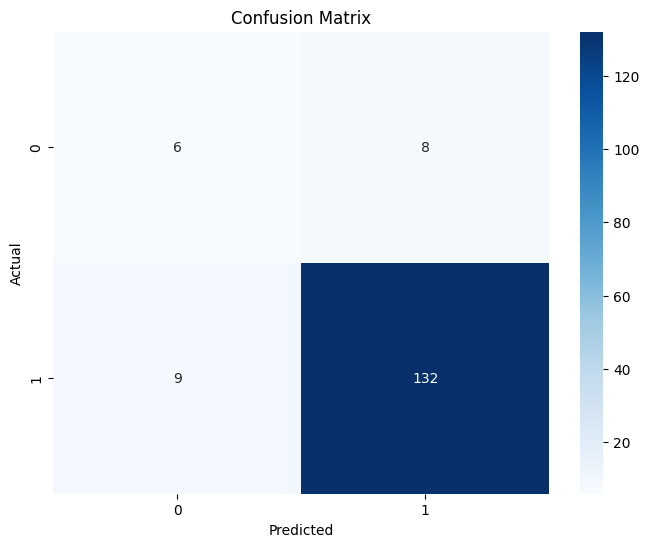

In [17]:
# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [18]:
# Step 13: Feature Importance Graph
feature_importances = rf_classifier.feature_importances_
features = X.columns

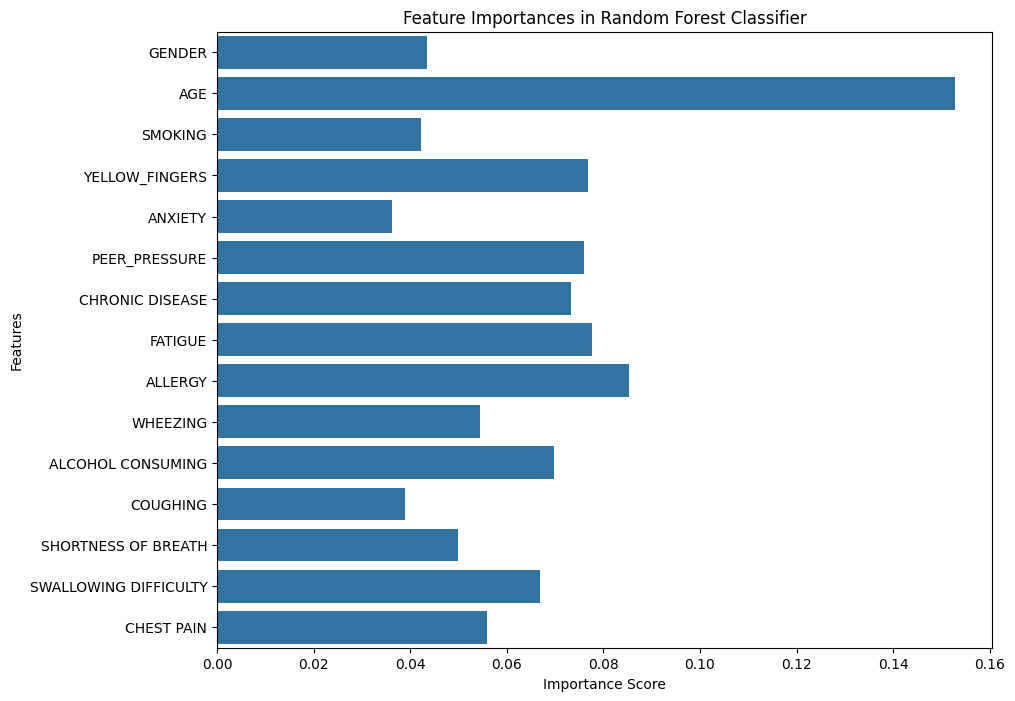

In [19]:
# Plotting feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=features)
plt.title("Feature Importances in Random Forest Classifier")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()